In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../novelgraphs/'))

import novelgraphs as ng

import pandas as pd
from collections import defaultdict, Counter
from itertools import combinations
import networkx as nx
from operator import itemgetter
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from numpy import array_split
import numpy
import json

In [2]:
text = ng.Text.from_pickle('table.pickle')

In [3]:
text.tags.head()

,SentenceID,TokenID,Token,Lemma,Pos,NER,DepParse,DepRel,NerNpID,Sentiment,QuotationID,DialogID,CharacterID
0,0,0,A,a,DT,O,1,det,None,NaN,None,None,None
1,0,1,STUDY,study,NN,O,-1,ROOT,None,NaN,None,None,None
2,0,2,IN,in,IN,O,4,case,None,NaN,None,None,None
3,0,3,SCARLET,scarlet,NNP,O,4,compound,None,NaN,None,None,None
4,0,4,Table,table,NNP,O,1,nmod:in,None,NaN,None,None,None


In [15]:
print(text.tags.loc[text.tags.Token == 'Dupin', "Token"])
# print(text.tags.loc[[38149, 38150, 38151]])

# запомнить идею!
# 42 примера, из которых 8 не размечено нером, хотя словосочения те же!!!
# print(text.tags.loc[[38149, 38150, 38151]])
# print(text.tags.loc[text.tags.Token == 'Hope', "CharacterID"]), Lestrade

6943    Dupin
6981    Dupin
6994    Dupin
Name: Token, dtype: object


In [3]:
core = ng.annotators.CoreNLP()
np = ng.annotators.NerNpID()
ann = ng.annotators.Sentiment()
ann2 = ng.annotators.Dialog()
qq = ng.annotators.Quote()
fp = ng.annotators.FirstPerson()
char = ng.annotators.Character()

In [6]:
# pipeline = ng.annotators.Pipeline([ann, qq, ann2, fp, char])
# pipeline.annotate(text)

In [4]:
dialog = ng.interaction.extractors.Dialog()
sentences = ng.interaction.extractors.Sentences()
sent_dist = ng.interaction.extractors.SentenceDistance()
tokens = ng.interaction.extractors.TokenDistance()
seq = ng.interaction.extractors.TokenSequence()
dep = ng.interaction.extractors.TokenDependencies()

count = ng.interaction.aggregators.Count()
sentiment = ng.interaction.aggregators.Sentiment()

In [5]:
def graph_weights(graph):
    return [edge[2]['weight'] for edge in graph.edges(data=True)]

### My_graph

In [78]:
my_char_list = []
# text.characters
for i in [2,3,75,27,12,21,7,24,32,67,28,30,43,25,73]:
    my_char_list.append(text.characters[i])

In [79]:
my_char_list

['madame charpentier',
 'arthur',
 'narrator',
 'holmes',
 'lestrade',
 'enoch drebber',
 'gregson',
 'joseph stangerson',
 'rance',
 'sawyer',
 'lucy',
 'john ferrier',
 'young',
 'hope',
 'cowper']

In [80]:
My_graph = nx.Graph()
My_graph.add_edges_from([(my_char_list[3],my_char_list[2]), (my_char_list[3],my_char_list[9]), 
                         (my_char_list[3],my_char_list[8]), (my_char_list[3],my_char_list[4]),
                         (my_char_list[3],my_char_list[6]), (my_char_list[2],my_char_list[4]),
                         (my_char_list[2],my_char_list[6]), (my_char_list[4],my_char_list[7]),
                         (my_char_list[7],my_char_list[5]), (my_char_list[5],my_char_list[1]),
                         (my_char_list[6],my_char_list[1]), 
                         (my_char_list[10],my_char_list[11]), (my_char_list[10],my_char_list[5]),
                         (my_char_list[10],my_char_list[13]), (my_char_list[13],my_char_list[11]),
                         (my_char_list[13],my_char_list[14]), (my_char_list[11],my_char_list[12]),
                         (my_char_list[11],my_char_list[5]), (my_char_list[13],my_char_list[5]),
                         (my_char_list[11],my_char_list[7]), (my_char_list[14],my_char_list[7]),
                         (my_char_list[3],my_char_list[13]), (my_char_list[2],my_char_list[13]),
                         (my_char_list[4],my_char_list[13]), (my_char_list[6],my_char_list[13])])

In [81]:
My_char_pers = [(my_char_list[3],my_char_list[2]), (my_char_list[3],my_char_list[9]), 
 (my_char_list[3],my_char_list[8]), (my_char_list[3],my_char_list[4]),
 (my_char_list[3],my_char_list[6]), (my_char_list[2],my_char_list[4]),
 (my_char_list[2],my_char_list[6]), (my_char_list[4],my_char_list[7]),
 (my_char_list[7],my_char_list[5]), (my_char_list[5],my_char_list[1]),
 (my_char_list[6],my_char_list[1]), 
 (my_char_list[10],my_char_list[11]), (my_char_list[10],my_char_list[5]),
 (my_char_list[10],my_char_list[13]), (my_char_list[13],my_char_list[11]),
 (my_char_list[13],my_char_list[14]), (my_char_list[11],my_char_list[12]),
 (my_char_list[11],my_char_list[5]), (my_char_list[13],my_char_list[5]),
 (my_char_list[11],my_char_list[7]), (my_char_list[14],my_char_list[7]),
 (my_char_list[3],my_char_list[13]), (my_char_list[2],my_char_list[13]),
 (my_char_list[4],my_char_list[13]), (my_char_list[6],my_char_list[13])]

In [82]:
# My_char_pers

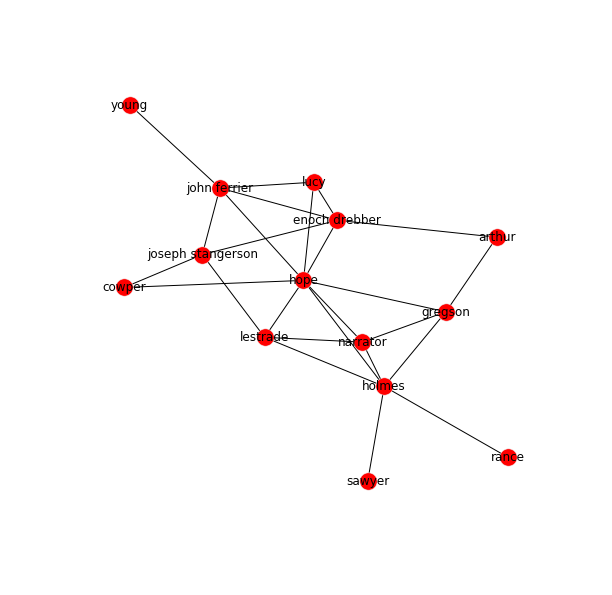

In [83]:
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx(My_graph,
                 with_labels=True)
plt.show()

In [84]:
!mkdir -p ./projectgraphs/sher

In [86]:
# nx.write_gml(My_graph,'./projectgraphs/sher/graph_gold.gml')

In [23]:
print(nx.info(My_graph))
# print(i, " count")
print('-----------------')
print('Связанный граф: ', nx.is_connected(My_graph))
# print("Для несвязанного графа нельзя посмотреть центральные узлы")
if nx.is_connected(My_graph):
    print('-----------------')
    print('Центральные узлы графа: ', nx.center(My_graph)[:5])
    print('Периферийные узлы графа: ', nx.periphery(My_graph)[:5])
    print('Наибольшее кратчайшее расстояние в графе: ', nx.diameter(My_graph))
    print('Среднее кратчайшее расстояние', nx.average_shortest_path_length(My_graph))
print('-----------------')
print('Средний кластерный коэффициент: ', nx.average_clustering(My_graph))
print('Центральные узлы: ', [i[0] for i in sorted(nx.degree_centrality(My_graph).items(), key=itemgetter(1), reverse=True)[:5]])
print('Срединные узлы: ', [i[0] for i in sorted(nx.betweenness_centrality(My_graph).items(), key=itemgetter(1), reverse=True)[:5]])
print('Близкие к другим словам узлы: ', [i[0] for i in sorted(nx.closeness_centrality(My_graph).items(), key=itemgetter(1), reverse=True)[:5]])
print("Центральность, связанная с собственными векторами: ", 
      [i[0] for i in sorted(nx.eigenvector_centrality_numpy(My_graph).items(), key=itemgetter(1), reverse=True)[:5]])
print('Количество клик: ', nx.graph_number_of_cliques(My_graph))
print('Размер наибольшей клики:', nx.graph_clique_number(My_graph))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 25
Average degree:   3.5714
-----------------
Связанный граф:  True
-----------------
Центральные узлы графа:  ['hope']
Периферийные узлы графа:  ['rance', 'young', 'sawyer']
Наибольшее кратчайшее расстояние в графе:  4
Среднее кратчайшее расстояние 2.0
-----------------
Средний кластерный коэффициент:  0.3156462585034014
Центральные узлы:  ['hope', 'holmes', 'enoch drebber', 'john ferrier', 'joseph stangerson']
Срединные узлы:  ['hope', 'holmes', 'john ferrier', 'enoch drebber', 'gregson']
Близкие к другим словам узлы:  ['hope', 'holmes', 'enoch drebber', 'john ferrier', 'narrator']
Центральность, связанная с собственными векторами:  ['hope', 'holmes', 'narrator', 'enoch drebber', 'lestrade']
Количество клик:  12
Размер наибольшей клики: 4


## Senti_graphs

Name: 
Type: Graph
Number of nodes: 60
Number of edges: 256
Average degree:   8.5333
<novelgraphs.interaction.extractors.dialog.Dialog object at 0x10f0018d0>  sentiment
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.8477201037595916
Центральные узлы:  ['narrator', 'holmes', 'enoch drebber', 'gregson', 'lestrade']
Срединные узлы:  ['narrator', 'holmes', 'enoch drebber', 'watson', 'john ferrier']
Близкие к другим словам узлы:  ['narrator', 'holmes', 'enoch drebber', 'gregson', 'lestrade']
Центральность, связанная с собственными векторами:  ['charles', 'lucy', 'lestrade', 'holmes', 'joseph stangerson']
Количество клик:  26
Размер наибольшей клики: 10


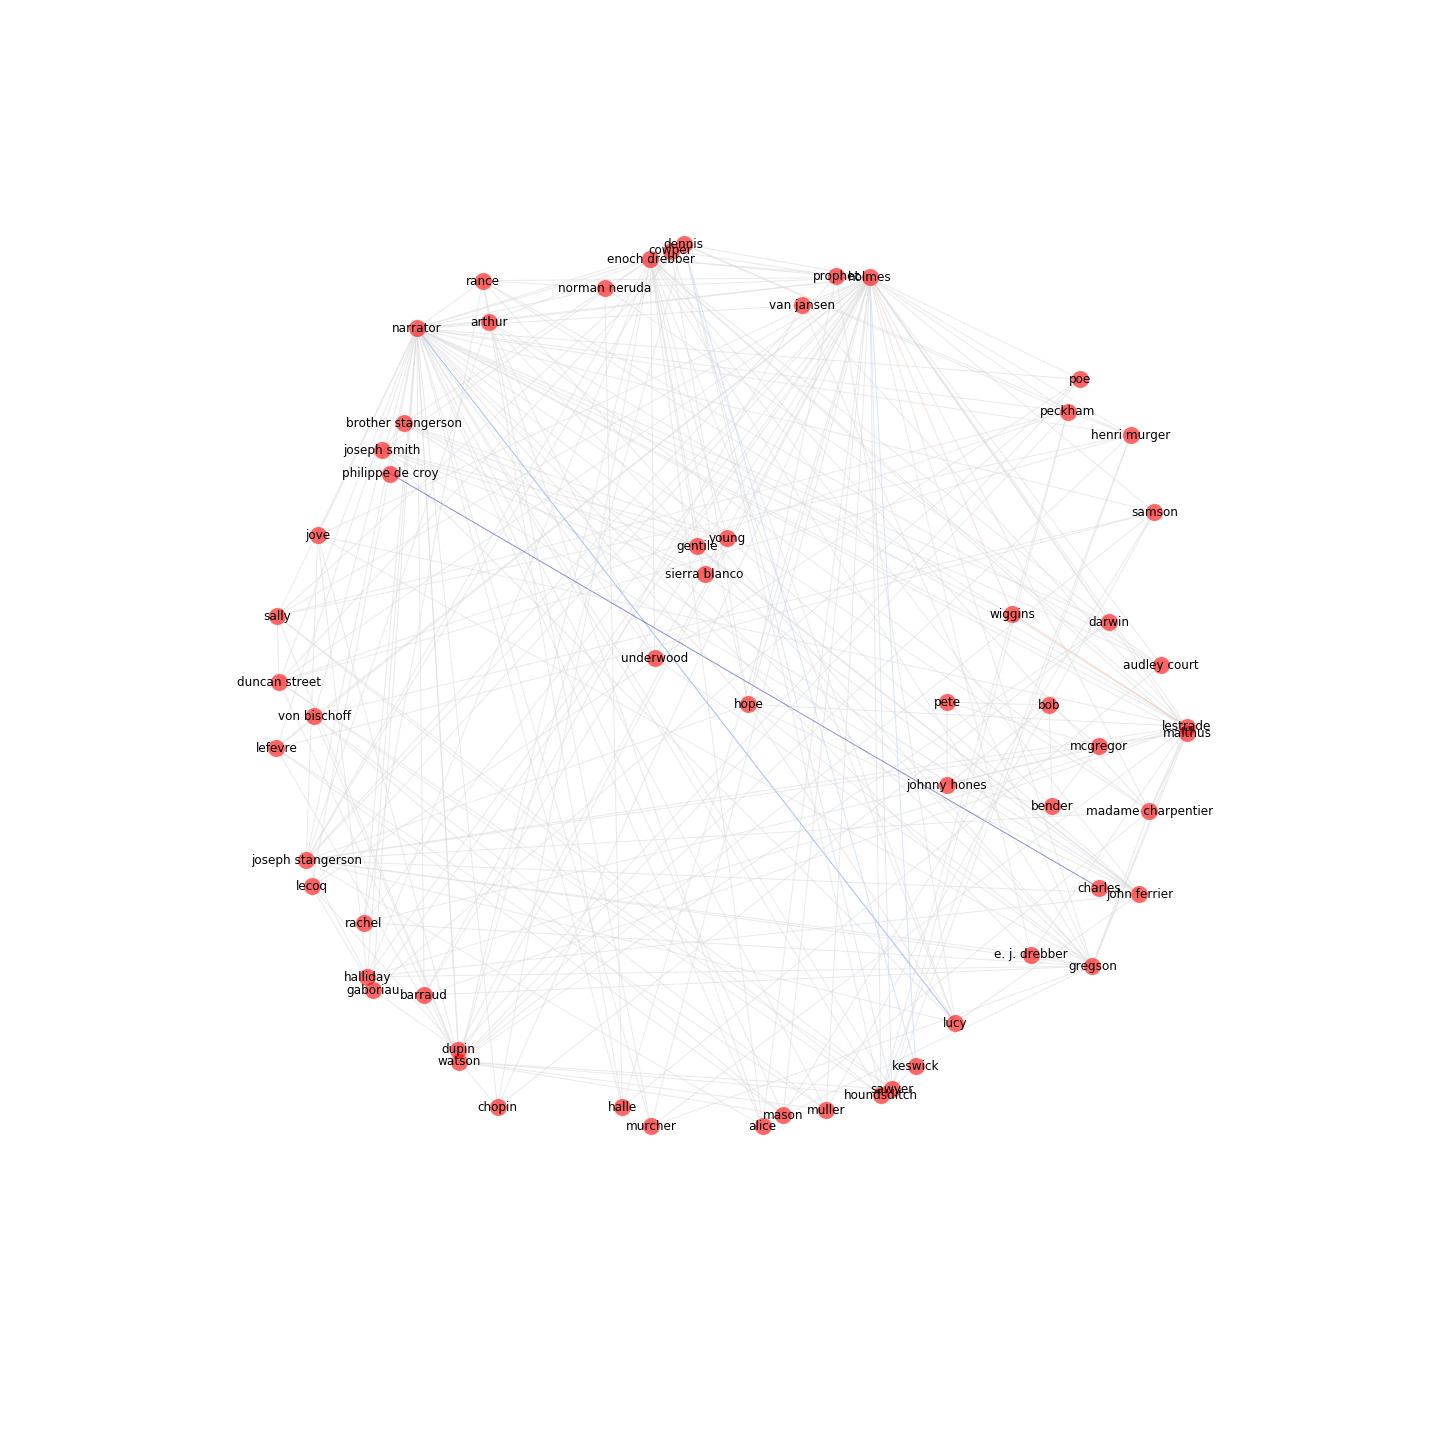

Name: 
Type: Graph
Number of nodes: 37
Number of edges: 65
Average degree:   3.5135
<novelgraphs.interaction.extractors.sentences.Sentences object at 0x10f001860>  sentiment
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.6079029339898906
Центральные узлы:  ['narrator', 'enoch drebber', 'joseph stangerson', 'gregson', 'holmes']
Срединные узлы:  ['narrator', 'enoch drebber', 'joseph stangerson', 'john ferrier', 'holmes']
Близкие к другим словам узлы:  ['narrator', 'joseph stangerson', 'enoch drebber', 'hope', 'john ferrier']
Центральность, связанная с собственными векторами:  ['narrator', 'halliday', 'hope', 'sally', 'john ferrier']
Количество клик:  26
Размер наибольшей клики: 5


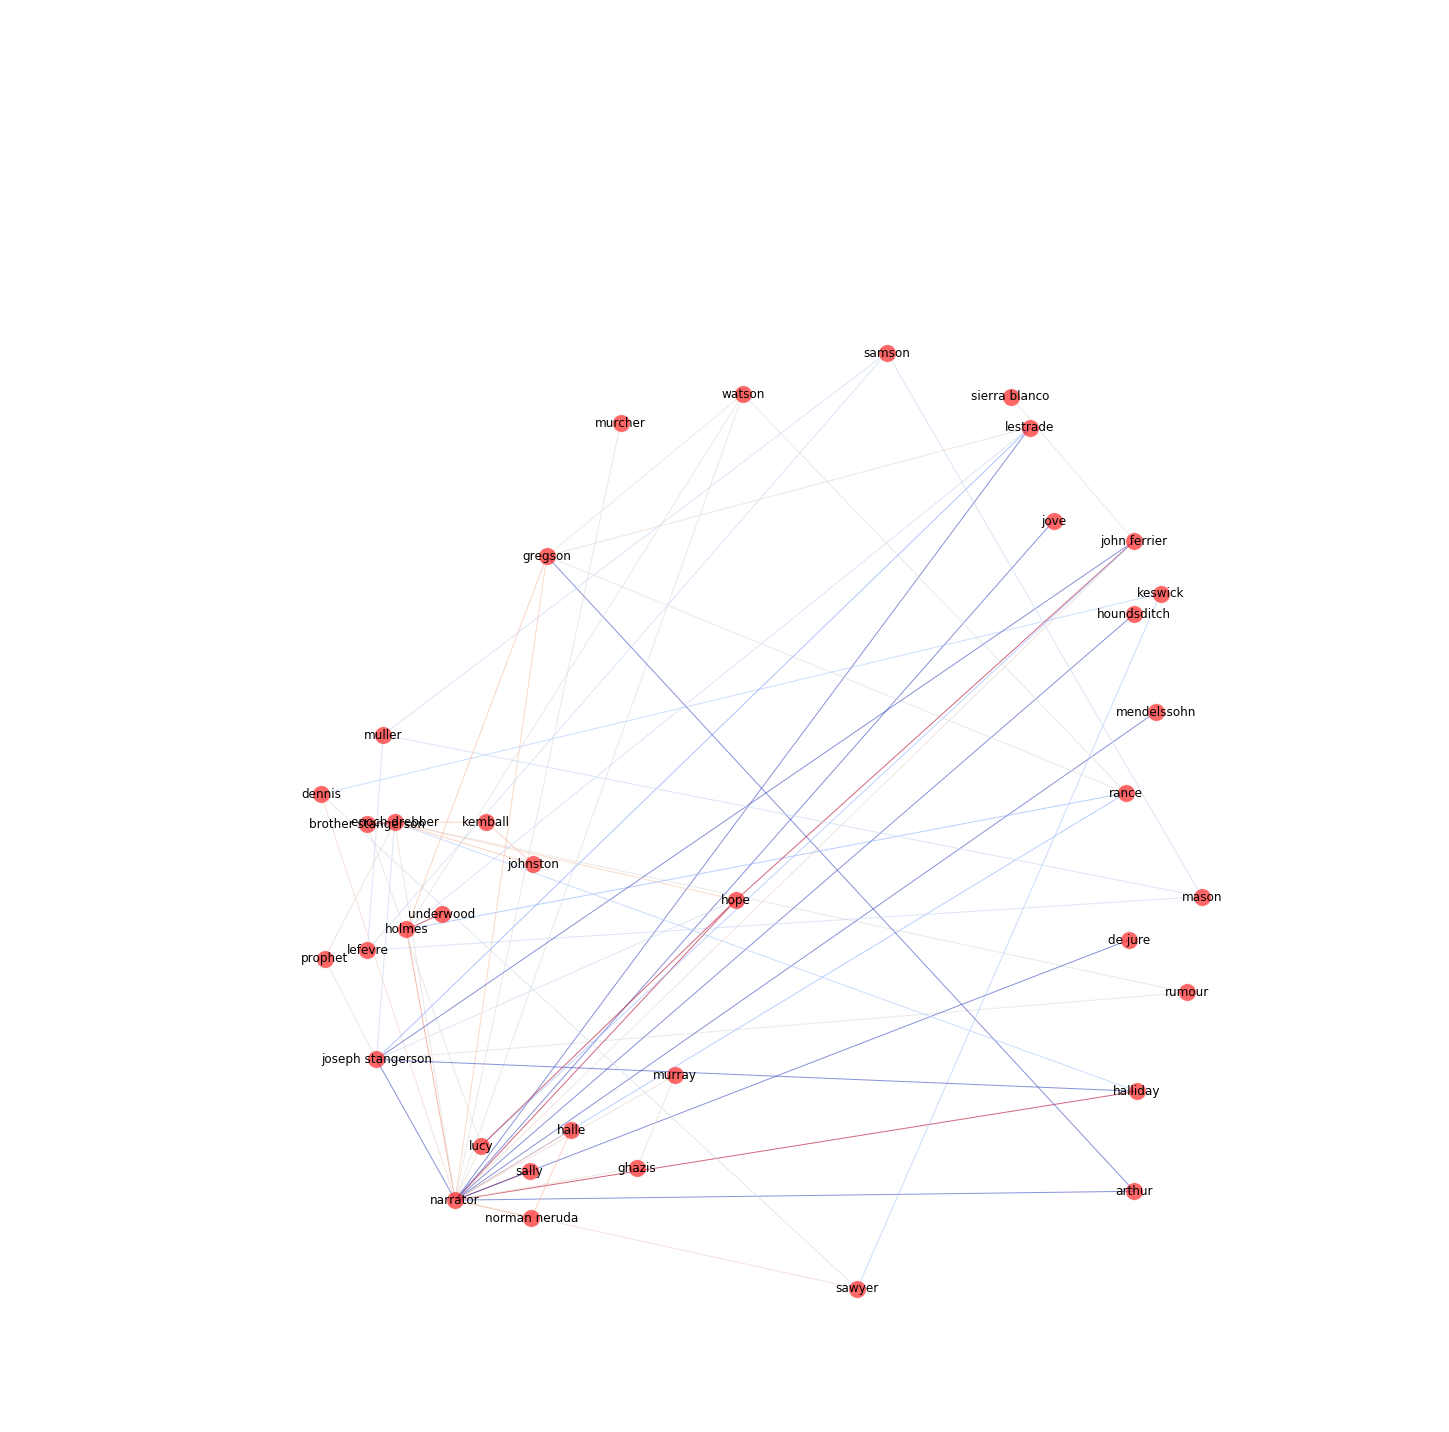

Name: 
Type: Graph
Number of nodes: 27
Number of edges: 35
Average degree:   2.5926
<novelgraphs.interaction.extractors.tokendistance.TokenDistance object at 0x10f001940>  sentiment
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.23348256681590016
Центральные узлы:  ['narrator', 'enoch drebber', 'arthur', 'john ferrier', 'gregson']
Срединные узлы:  ['narrator', 'enoch drebber', 'hope', 'halliday', 'ghazis']
Близкие к другим словам узлы:  ['narrator', 'enoch drebber', 'arthur', 'halliday', 'gregson']
Центральность, связанная с собственными векторами:  ['rance', 'enoch drebber', 'ghazis', 'jove', 'houndsditch']
Количество клик:  22
Размер наибольшей клики: 4


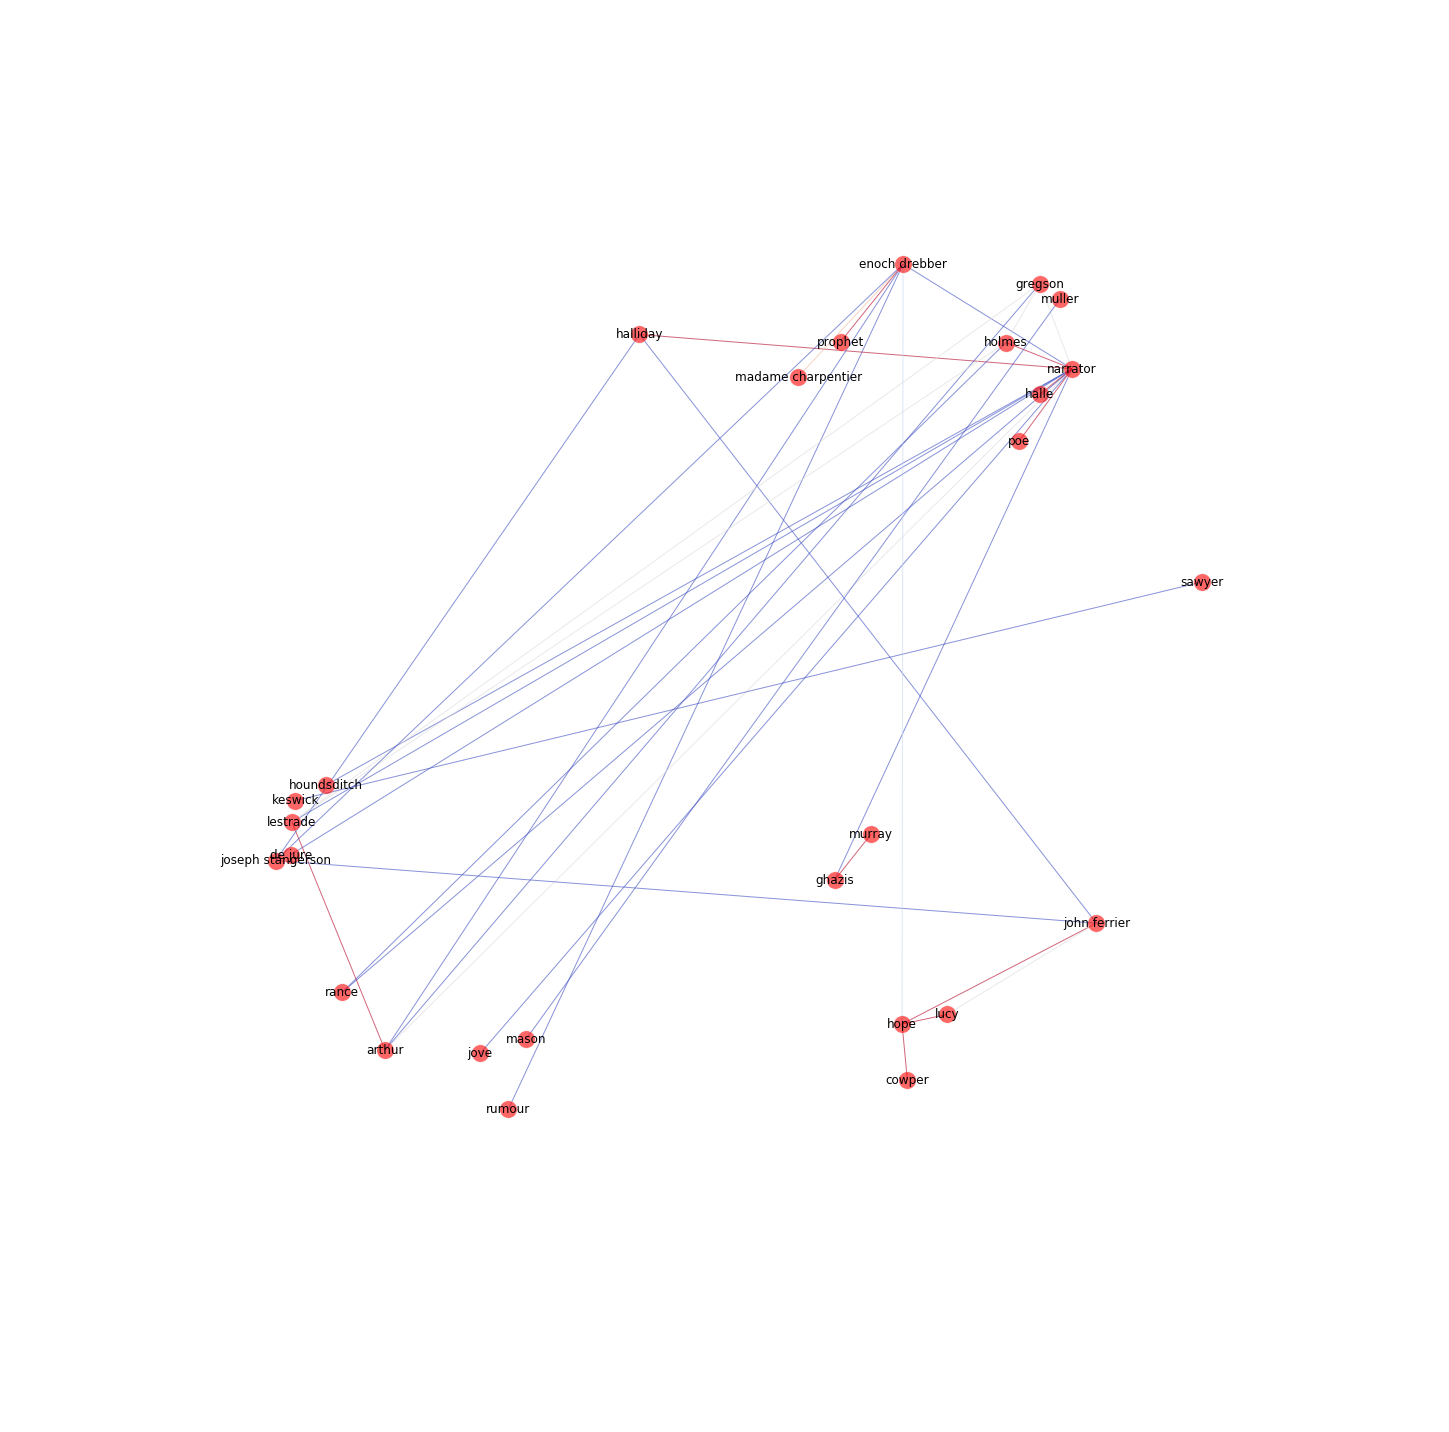

Name: 
Type: Graph
Number of nodes: 61
Number of edges: 106
Average degree:   3.4754
<novelgraphs.interaction.extractors.sentencedistance.SentenceDistance object at 0x10f001908>  sentiment
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.31915967958930086
Центральные узлы:  ['narrator', 'holmes', 'enoch drebber', 'gregson', 'john ferrier']
Срединные узлы:  ['narrator', 'john ferrier', 'enoch drebber', 'von bischoff', 'mason']
Близкие к другим словам узлы:  ['narrator', 'enoch drebber', 'holmes', 'john ferrier', 'gregson']
Центральность, связанная с собственными векторами:  ['narrator', 'poe', 'von bischoff', 'halle', 'arthur']
Количество клик:  59
Размер наибольшей клики: 5


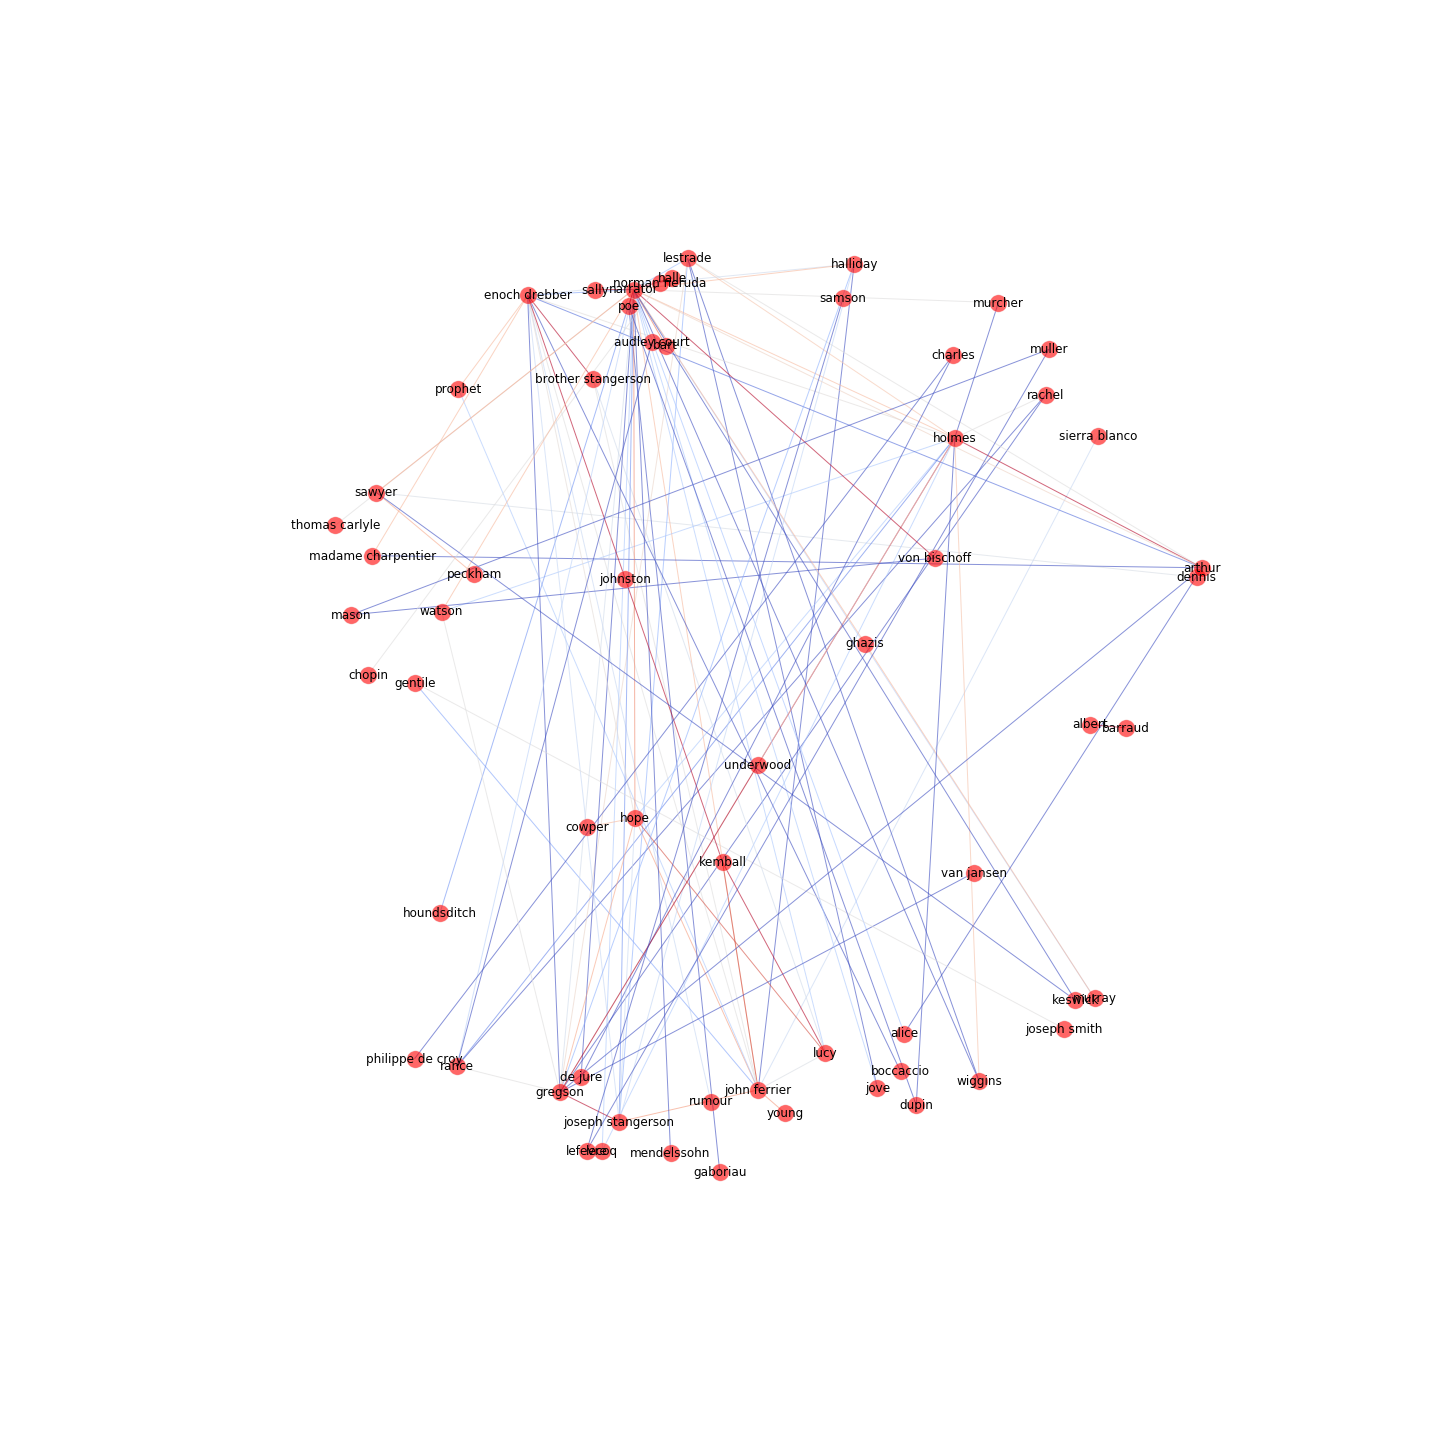

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 3
Average degree:   1.5000
<novelgraphs.interaction.extractors.tokensequence.TokenSequence object at 0x10f001978>  sentiment
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.0
Центральные узлы:  ['narrator', 'halliday', 'joseph stangerson', 'enoch drebber']
Срединные узлы:  ['halliday', 'joseph stangerson', 'enoch drebber', 'narrator']
Близкие к другим словам узлы:  ['halliday', 'joseph stangerson', 'enoch drebber', 'narrator']
Центральность, связанная с собственными векторами:  ['enoch drebber', 'narrator', 'halliday', 'joseph stangerson']
Количество клик:  2
Размер наибольшей клики: 2


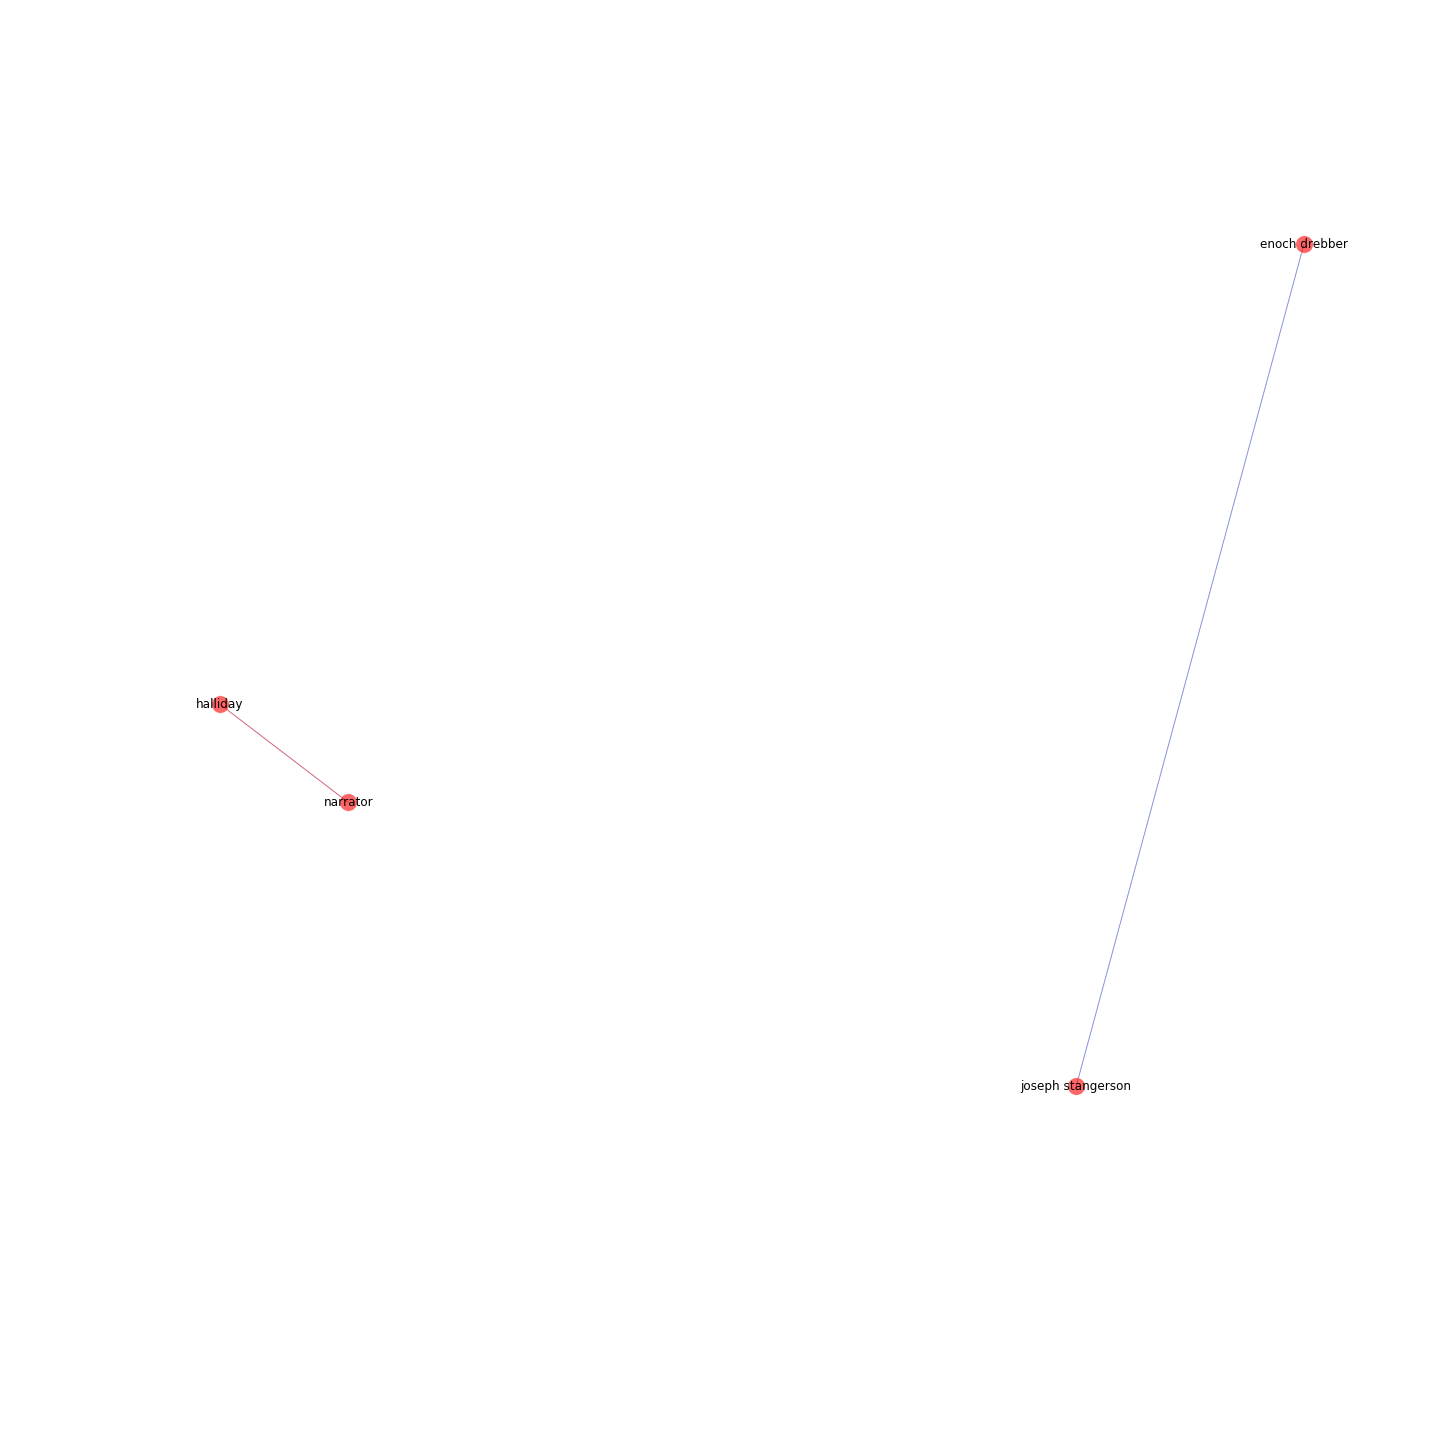

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 4
Average degree:   1.6000
<novelgraphs.interaction.extractors.tokendependencies.TokenDependencies object at 0x10f0019b0>  sentiment
-----------------
Связанный граф:  True
-----------------
Центральные узлы графа:  ['holmes']
Периферийные узлы графа:  ['lestrade', 'narrator', 'gregson', 'rance']
Наибольшее кратчайшее расстояние в графе:  2
Среднее кратчайшее расстояние 1.6
-----------------
Средний кластерный коэффициент:  0.0
Центральные узлы:  ['holmes', 'lestrade', 'narrator', 'gregson', 'rance']
Срединные узлы:  ['holmes', 'lestrade', 'narrator', 'gregson', 'rance']
Близкие к другим словам узлы:  ['holmes', 'lestrade', 'narrator', 'gregson', 'rance']
Центральность, связанная с собственными векторами:  ['rance', 'narrator', 'gregson', 'lestrade', 'holmes']
Количество клик:  4
Размер наибольшей клики: 2


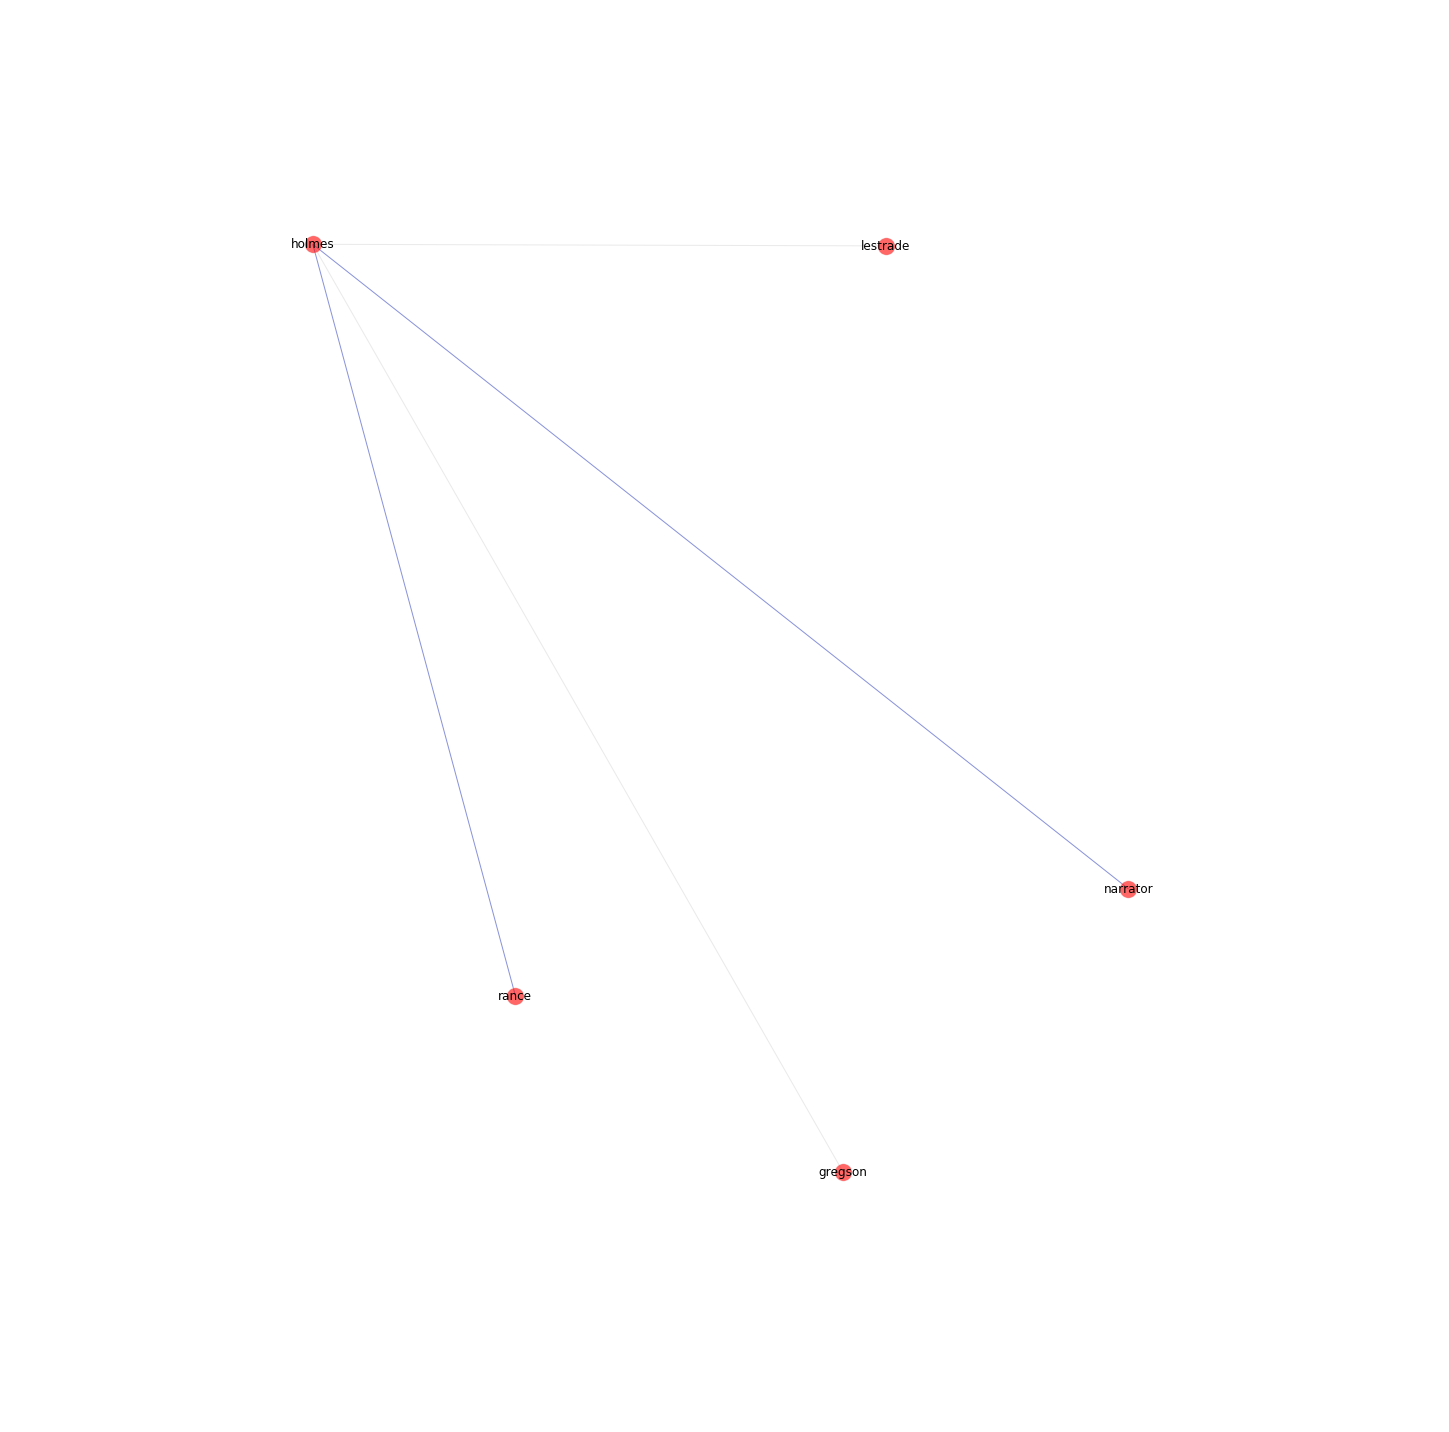

In [9]:
senti_graphs = []
for i in [dialog, sentences, tokens, sent_dist, seq, dep]:
    novelgraph = ng.NovelGraph(i, sentiment)
    graph = novelgraph(text)

    weights = graph_weights(graph)
    
    senti_graphs.append(graph)
    print(nx.info(graph))
    print(i, " sentiment")
    print('-----------------')
    print('Связанный граф: ', nx.is_connected(graph))
    # print("Для несвязанного графа нельзя посмотреть центральные узлы")
    if nx.is_connected(graph):
        print('-----------------')
        print('Центральные узлы графа: ', nx.center(graph)[:5])
        print('Периферийные узлы графа: ', nx.periphery(graph)[:5])
        print('Наибольшее кратчайшее расстояние в графе: ', nx.diameter(graph))
        print('Среднее кратчайшее расстояние', nx.average_shortest_path_length(graph))
    print('-----------------')
    print('Средний кластерный коэффициент: ', nx.average_clustering(graph))
    print('Центральные узлы: ', [i[0] for i in sorted(nx.degree_centrality(graph).items(), key=itemgetter(1), reverse=True)[:5]])
    print('Срединные узлы: ', [i[0] for i in sorted(nx.betweenness_centrality(graph).items(), key=itemgetter(1), reverse=True)[:5]])
    print('Близкие к другим словам узлы: ', [i[0] for i in sorted(nx.closeness_centrality(graph).items(), key=itemgetter(1), reverse=True)[:5]])
    print("Центральность, связанная с собственными векторами: ", 
          [i[0] for i in sorted(nx.eigenvector_centrality_numpy(graph).items(), key=itemgetter(1), reverse=True)[:5]])
    print('Количество клик: ', nx.graph_number_of_cliques(graph))
    print('Размер наибольшей клики:', nx.graph_clique_number(graph))
    # print('Ядра:', nx.core_number(conv_graph))
    
    plt.figure(figsize=(25, 25))
    plt.axis('off')
    nx.draw_spring(graph,
                     with_labels=True,
                     edge_color=weights,
                     edge_cmap=plt.cm.coolwarm,
                     edge_vmax = 0.5, edge_vmin=-0.5, alpha=0.6)
    
    plt.savefig('./projectgraphs/sher/graph_senti_{}.pdf'.format(str(i).split('.')[4].split(' ')[0]))
    plt.show()
#     nx.write_gml(graph,'./projectgraphs/sher/graph_senti_{}.gml'.format(str(i).split('.')[4].split(' ')[0]))

In [20]:
# [dialog, sentences, tokens, sent_dist, seq, dep]
for graph in senti_graphs:
    print('-----------------')
    print('-----------------')
    print('-----------------')
    print(graph.nodes() == my_char_list)
    exception = set(my_char_list) - set(graph.nodes())
    intersection = set(my_char_list) & set(graph.nodes())
    add = set(graph.nodes()) - set(my_char_list)
    precision = len(intersection) / (len(intersection) + len(add))
    recall = len(intersection) / (len(intersection) + len(exception))
    print('Exception: ', len(exception), exception)
    print('Intersection: ', len(intersection), intersection)
    print('Add-s: ', len(add)) #set(graph.nodes()) - set(my_char_list)#
#     print('Accuracy: ', len(intersection) / len(set(my_char_list)))
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F: ', 2 * (precision * recall / (precision + recall)))
    
    print('-----------------')
    print(graph.edges() == My_graph.edges())
    exception = set(My_graph.edges()) - set(graph.edges())
    intersection = set(My_graph.edges()) & set(graph.edges())
    add = set(graph.edges()) - set(My_graph.edges())
    precision = len(intersection) / (len(intersection) + len(add))
    recall = len(intersection) / (len(intersection) + len(exception))
    print('Exception: ', len(exception), exception)
    print('Intersection: ', len(intersection), intersection)
    print('Add-s: ', len(add)) #set(graph.nodes()) - set(my_char_list)#
#     print('Accuracy: ', len(intersection) / len(set(my_char_list)))
    print('Precision: ', precision)
    print('Recall: ', recall)
    if recall != 0 and precision != 0:
        print('F: ', 2 * (precision * recall / (precision + recall)))

-----------------
-----------------
-----------------
False
Exception:  0 set()
Intersection:  15 {'cowper', 'holmes', 'hope', 'rance', 'enoch drebber', 'madame charpentier', 'joseph stangerson', 'lucy', 'john ferrier', 'lestrade', 'young', 'narrator', 'arthur', 'sawyer', 'gregson'}
Add-s:  45
Precision:  0.25
Recall:  1.0
F:  0.4
-----------------
False
Exception:  7 {('holmes', 'hope'), ('enoch drebber', 'lucy'), ('enoch drebber', 'john ferrier'), ('narrator', 'gregson'), ('joseph stangerson', 'john ferrier'), ('joseph stangerson', 'lestrade'), ('enoch drebber', 'arthur')}
Intersection:  18 {('hope', 'enoch drebber'), ('holmes', 'narrator'), ('hope', 'lestrade'), ('holmes', 'sawyer'), ('hope', 'narrator'), ('holmes', 'gregson'), ('cowper', 'joseph stangerson'), ('enoch drebber', 'joseph stangerson'), ('holmes', 'lestrade'), ('lucy', 'john ferrier'), ('holmes', 'rance'), ('hope', 'john ferrier'), ('john ferrier', 'young'), ('lestrade', 'narrator'), ('hope', 'lucy'), ('arthur', 'gregso

## Count_graphs

Name: 
Type: Graph
Number of nodes: 60
Number of edges: 256
Average degree:   8.5333
<novelgraphs.interaction.extractors.dialog.Dialog object at 0x11551dfd0>  count
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.8477201037595917
Центральные узлы:  ['narrator', 'holmes', 'enoch drebber', 'gregson', 'lestrade']
Срединные узлы:  ['narrator', 'holmes', 'enoch drebber', 'watson', 'john ferrier']
Близкие к другим словам узлы:  ['narrator', 'holmes', 'enoch drebber', 'gregson', 'lestrade']
Центральность, связанная с собственными векторами:  ['narrator', 'holmes', 'gregson', 'lestrade', 'enoch drebber']
Количество клик:  26
Размер наибольшей клики: 10


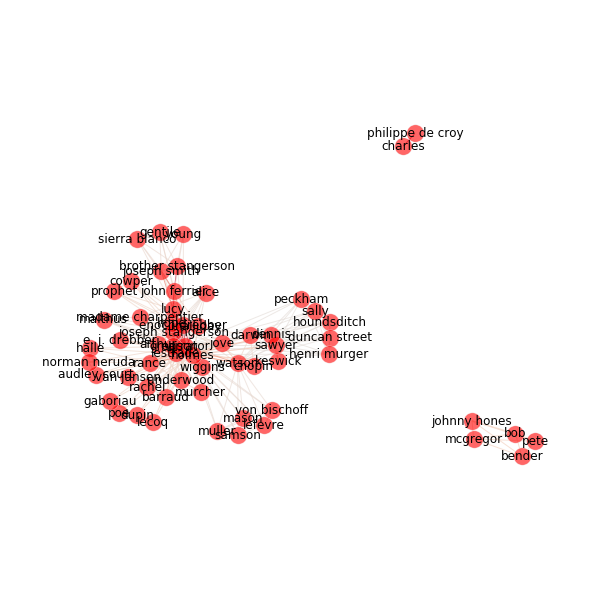

Name: 
Type: Graph
Number of nodes: 49
Number of edges: 82
Average degree:   3.3469
<novelgraphs.interaction.extractors.sentences.Sentences object at 0x11551df98>  count
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.5618291761148904
Центральные узлы:  ['narrator', 'enoch drebber', 'joseph stangerson', 'holmes', 'gregson']
Срединные узлы:  ['narrator', 'enoch drebber', 'joseph stangerson', 'john ferrier', 'sally']
Близкие к другим словам узлы:  ['narrator', 'joseph stangerson', 'enoch drebber', 'hope', 'gregson']
Центральность, связанная с собственными векторами:  ['narrator', 'holmes', 'gregson', 'lestrade', 'enoch drebber']
Количество клик:  34
Размер наибольшей клики: 5


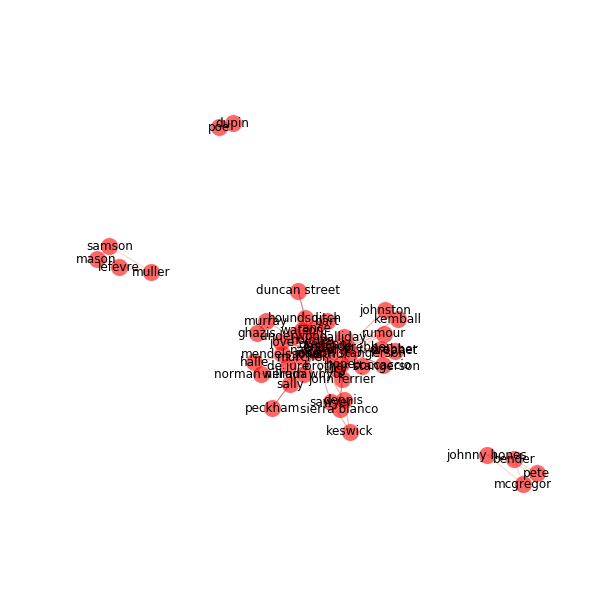

Name: 
Type: Graph
Number of nodes: 57
Number of edges: 81
Average degree:   2.8421
<novelgraphs.interaction.extractors.tokendistance.TokenDistance object at 0x112fd9780>  count
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.23453667839632752
Центральные узлы:  ['narrator', 'enoch drebber', 'holmes', 'joseph stangerson', 'lestrade']
Срединные узлы:  ['narrator', 'enoch drebber', 'joseph stangerson', 'halle', 'poe']
Близкие к другим словам узлы:  ['narrator', 'enoch drebber', 'joseph stangerson', 'john ferrier', 'halliday']
Центральность, связанная с собственными векторами:  ['narrator', 'holmes', 'gregson', 'lestrade', 'enoch drebber']
Количество клик:  47
Размер наибольшей клики: 5


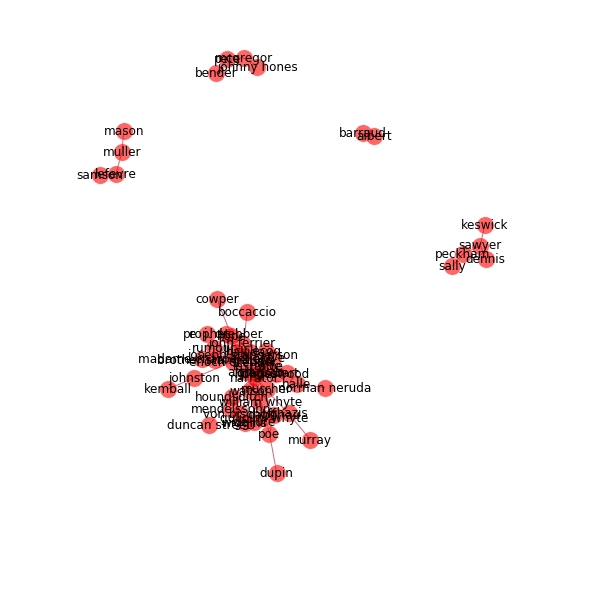

Name: 
Type: Graph
Number of nodes: 69
Number of edges: 125
Average degree:   3.6232
<novelgraphs.interaction.extractors.sentencedistance.SentenceDistance object at 0x1155200b8>  count
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.3314621179710694
Центральные узлы:  ['narrator', 'enoch drebber', 'holmes', 'gregson', 'john ferrier']
Срединные узлы:  ['narrator', 'john ferrier', 'enoch drebber', 'von bischoff', 'gregson']
Близкие к другим словам узлы:  ['narrator', 'enoch drebber', 'holmes', 'gregson', 'joseph stangerson']
Центральность, связанная с собственными векторами:  ['narrator', 'holmes', 'gregson', 'lestrade', 'enoch drebber']
Количество клик:  68
Размер наибольшей клики: 5


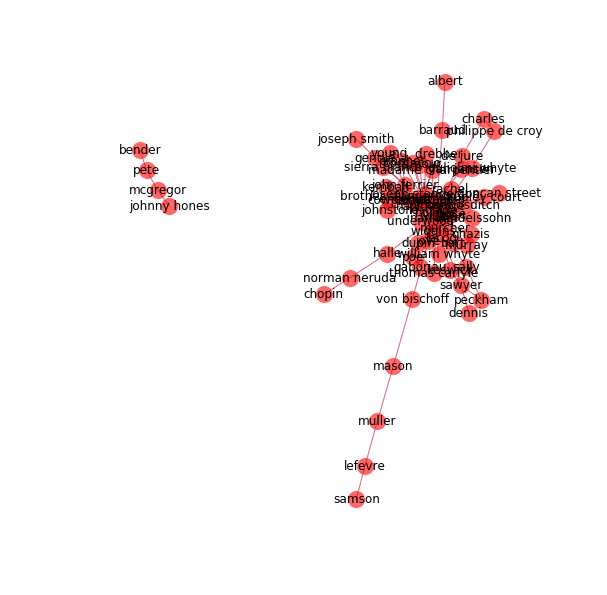

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 5
Average degree:   1.6667
<novelgraphs.interaction.extractors.tokensequence.TokenSequence object at 0x112fd97f0>  count
-----------------
Связанный граф:  False
-----------------
Средний кластерный коэффициент:  0.0
Центральные узлы:  ['narrator', 'gregson', 'murcher', 'enoch drebber', 'joseph stangerson']
Срединные узлы:  ['narrator', 'gregson', 'murcher', 'enoch drebber', 'joseph stangerson']
Близкие к другим словам узлы:  ['narrator', 'gregson', 'murcher', 'halliday', 'enoch drebber']
Центральность, связанная с собственными векторами:  ['narrator', 'halliday', 'murcher', 'gregson', 'enoch drebber']
Количество клик:  4
Размер наибольшей клики: 2


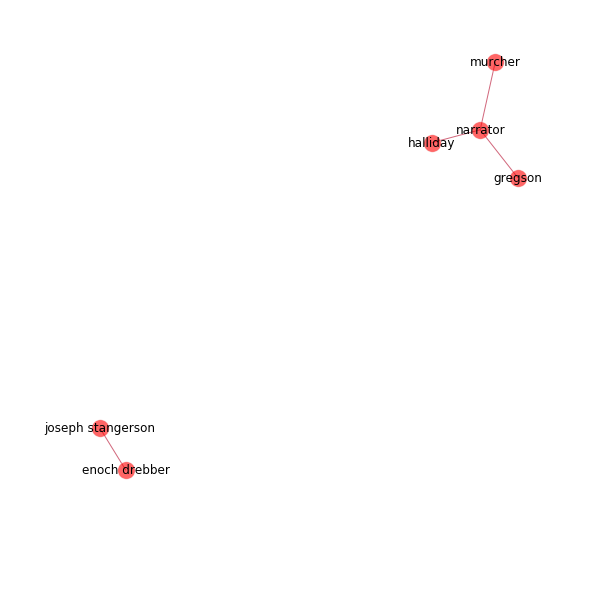

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 6
Average degree:   1.7143
<novelgraphs.interaction.extractors.tokendependencies.TokenDependencies object at 0x112fd9828>  count
-----------------
Связанный граф:  True
-----------------
Центральные узлы графа:  ['narrator', 'holmes']
Периферийные узлы графа:  ['lestrade', 'gregson', 'murcher', 'rance', 'joseph stangerson']
Наибольшее кратчайшее расстояние в графе:  3
Среднее кратчайшее расстояние 2.0
-----------------
Средний кластерный коэффициент:  0.0
Центральные узлы:  ['holmes', 'narrator', 'lestrade', 'gregson', 'murcher']
Срединные узлы:  ['holmes', 'narrator', 'lestrade', 'gregson', 'murcher']
Близкие к другим словам узлы:  ['holmes', 'narrator', 'lestrade', 'gregson', 'rance']
Центральность, связанная с собственными векторами:  ['holmes', 'narrator', 'gregson', 'rance', 'lestrade']
Количество клик:  6
Размер наибольшей клики: 2


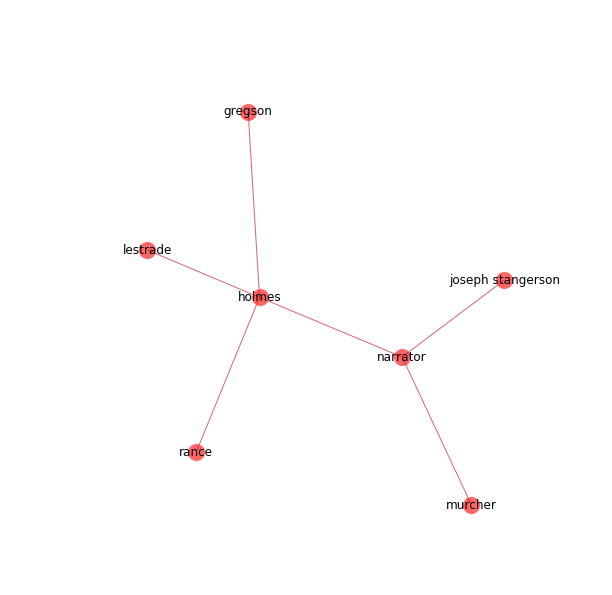

In [88]:
count_graphs = []
for i in [dialog, sentences, tokens, sent_dist, seq, dep]:
    novelgraph = ng.NovelGraph(i, count)
    graph = novelgraph(text)

    weights = graph_weights(graph)
    
    count_graphs.append(graph)
    print(nx.info(graph))
    print(i, " count")
    print('-----------------')
    print('Связанный граф: ', nx.is_connected(graph))
    # print("Для несвязанного графа нельзя посмотреть центральные узлы")
    if nx.is_connected(graph):
        print('-----------------')
        print('Центральные узлы графа: ', nx.center(graph)[:5])
        print('Периферийные узлы графа: ', nx.periphery(graph)[:5])
        print('Наибольшее кратчайшее расстояние в графе: ', nx.diameter(graph))
        print('Среднее кратчайшее расстояние', nx.average_shortest_path_length(graph))
    print('-----------------')
    print('Средний кластерный коэффициент: ', nx.average_clustering(graph))
    print('Центральные узлы: ', [i[0] for i in sorted(nx.degree_centrality(graph).items(), key=itemgetter(1), reverse=True)[:5]])
    print('Срединные узлы: ', [i[0] for i in sorted(nx.betweenness_centrality(graph).items(), key=itemgetter(1), reverse=True)[:5]])
    print('Близкие к другим словам узлы: ', [i[0] for i in sorted(nx.closeness_centrality(graph).items(), key=itemgetter(1), reverse=True)[:5]])
    print("Центральность, связанная с собственными векторами: ", 
          [i[0] for i in sorted(nx.eigenvector_centrality_numpy(graph).items(), key=itemgetter(1), reverse=True)[:5]])
    print('Количество клик: ', nx.graph_number_of_cliques(graph))
    print('Размер наибольшей клики:', nx.graph_clique_number(graph))
    # print('Ядра:', nx.core_number(conv_graph))
    
    plt.figure(figsize=(10,10))
    plt.axis('off')
    nx.draw_networkx(graph,
                     with_labels=True,
                     edge_color=weights,
                     edge_cmap=plt.cm.coolwarm,
                     edge_vmax = 0.5, edge_vmin=-0.5, alpha=0.6)
    plt.show()
    #plt.savefig('./projectgraphs/sher/graph_i_count.svg')
    nx.write_gml(graph,'./projectgraphs/sher/graph_count_{}.gml'.format(str(i).split('.')[4].split(' ')[0]))

In [22]:
# [dialog, sentences, tokens, sent_dist, seq, dep]
for graph in count_graphs:
    print('-----------------')
    print('-----------------')
    print('-----------------')
    
    print(graph.nodes() == my_char_list)
    exception = set(my_char_list) - set(graph.nodes())
    intersection = set(my_char_list) & set(graph.nodes())
    add = set(graph.nodes()) - set(my_char_list)
    precision = len(intersection) / (len(intersection) + len(add))
    recall = len(intersection) / (len(intersection) + len(exception))
    print('Exception: ', len(exception), exception)
    print('Intersection: ', len(intersection), intersection)
    print('Add-s: ', len(add)) #set(graph.nodes()) - set(my_char_list)#
#     print('Accuracy: ', len(intersection) / len(set(my_char_list)))
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F: ', 2 * (precision * recall / (precision + recall)))
    
    print('-----------------')
    print(graph.edges() == My_graph.edges())
    exception = set(My_graph.edges()) - set(graph.edges())
    intersection = set(My_graph.edges()) & set(graph.edges())
    add = set(graph.edges()) - set(My_graph.edges())
    precision = len(intersection) / (len(intersection) + len(add))
    recall = len(intersection) / (len(intersection) + len(exception))
    print('Exception: ', len(exception), exception)
    print('Intersection: ', len(intersection), intersection)
    print('Add-s: ', len(add)) #set(graph.nodes()) - set(my_char_list)#
#     print('Accuracy: ', len(intersection) / len(set(my_char_list)))
    print('Precision: ', precision)
    print('Recall: ', recall)
    if recall != 0 and precision != 0:
        print('F: ', 2 * (precision * recall / (precision + recall)))

-----------------
-----------------
-----------------
False
Exception:  0 set()
Intersection:  15 {'cowper', 'holmes', 'hope', 'rance', 'enoch drebber', 'madame charpentier', 'joseph stangerson', 'lucy', 'john ferrier', 'lestrade', 'young', 'narrator', 'arthur', 'sawyer', 'gregson'}
Add-s:  45
Precision:  0.25
Recall:  1.0
F:  0.4
-----------------
False
Exception:  7 {('holmes', 'hope'), ('enoch drebber', 'lucy'), ('enoch drebber', 'john ferrier'), ('narrator', 'gregson'), ('joseph stangerson', 'john ferrier'), ('joseph stangerson', 'lestrade'), ('enoch drebber', 'arthur')}
Intersection:  18 {('hope', 'enoch drebber'), ('holmes', 'narrator'), ('hope', 'lestrade'), ('holmes', 'sawyer'), ('hope', 'narrator'), ('holmes', 'gregson'), ('cowper', 'joseph stangerson'), ('enoch drebber', 'joseph stangerson'), ('holmes', 'lestrade'), ('lucy', 'john ferrier'), ('holmes', 'rance'), ('hope', 'john ferrier'), ('john ferrier', 'young'), ('lestrade', 'narrator'), ('hope', 'lucy'), ('arthur', 'gregso

### sinnet sher

In [6]:
with open('../conanDoyle_study_in_scarlet.json') as file:
    json_sher = json.load(file)

In [7]:
nsher = {}
for number, node in enumerate(json_sher['nodes']):
    nsher[number] = node['name']

In [8]:
# nsher

In [9]:
nlink = []
for link in json_sher['links']:
    nlink.append((link['source'], link['target']))

In [10]:
nlink[0]

(42, 37)

In [11]:
npair = []
for l in nlink:
    npair.append((nsher[l[0]], nsher[l[1]]))

In [13]:
nlinks = set([tuple(sorted(pair)) for pair in npair])

In [14]:
nlinks

{('Arthur', 'Stangerson'),
 ('Bob', 'Now'),
 ('Daughter', 'Ferrier'),
 ('Daughter', 'Now'),
 ('Daughter', 'Stangerson'),
 ('Dennis', 'Sally'),
 ('Drebber', 'Stangerson'),
 ('Dupin', 'Gentile'),
 ('Dupin', 'Lestrade'),
 ('Dupin', 'Stangerson'),
 ('Dupin', 'Underwood'),
 ('Ferrier', 'Gentile'),
 ('Ferrier', 'Hope'),
 ('Ferrier', 'Jefferson'),
 ('Ferrier', 'Now'),
 ('Ferrier', 'Stangerson'),
 ('Ghazis', 'Now'),
 ('Gregson', 'Now'),
 ('Gregson', 'Rachel'),
 ('Halliday', 'Stangerson'),
 ('Holmes', 'Holmes'),
 ('Holmes', 'Lestrade'),
 ('Holmes', 'Now'),
 ('Holmes', 'Rance'),
 ('Holmes', 'Stangerson'),
 ('Holmes', 'Underwood'),
 ('Hope', 'John'),
 ('Hope', 'Lucy'),
 ('Hope', 'Stangerson'),
 ('I.', 'Now'),
 ('Lestrade', 'Now'),
 ('Lestrade', 'Rance'),
 ('Lestrade', 'Stangerson'),
 ('Lucy', 'Now'),
 ('Lucy', 'Stangerson'),
 ('Now', 'Rance'),
 ('Now', 'Stangerson'),
 ('Now', 'Thomas'),
 ('Stangerson', 'Underwood')}

In [136]:
len(My_graph.edges())-10

15

In [137]:
print('--------Nodes--------')
exception = 2
intersection = 11
add = 39
precision = intersection / (intersection + add)
recall = intersection / (intersection + exception)
print('Exception: ', exception)
print('Intersection: ', intersection)
print('Add-s: ', add) #set(graph.nodes()) - set(my_char_list)#

print('Precision: ', precision)
print('Recall: ', recall)
print('F: ', 2 * (precision * recall / (precision + recall)))

print('--------Edges--------')
exception = 15
intersection = 10
add = 29
precision = intersection / (intersection + add)
recall = intersection / (intersection + exception)
print('Exception: ', exception)
print('Intersection: ', intersection)
print('Add-s: ', add) #set(graph.nodes()) - set(my_char_list)#
#     print('Accuracy: ', len(intersection) / len(set(my_char_list)))
print('Precision: ', precision)
print('Recall: ', recall)
if recall != 0 and precision != 0:
    print('F: ', 2 * (precision * recall / (precision + recall)))

--------Nodes--------
Exception:  2
Intersection:  11
Add-s:  39
Precision:  0.22
Recall:  0.8461538461538461
F:  0.3492063492063492
--------Edges--------
Exception:  15
Intersection:  10
Add-s:  29
Precision:  0.2564102564102564
Recall:  0.4
F:  0.3125


### Rolling window

In [89]:
def rolling_window_slices(window_size, step, length):
    if length <= 18000:
        window_size = 3000
        step = 1000
    
    num_slices = max((length - window_size) // step, 0)
    return ([slice(i * step, i * step + window_size) for i in range(num_slices)] +
             [slice(num_slices * step, length)])

In [90]:
rolling_window_slices(10000, 2000, len(text.tags))[:5]

[slice(0, 10000, None),
 slice(2000, 12000, None),
 slice(4000, 14000, None),
 slice(6000, 16000, None),
 slice(8000, 18000, None)]

### Negative graph plot

In [ ]:
# num_chapters = 10

# chapters = []
# for tags in array_split(text.tags, num_chapters):
#     chapter = ng.Text('')
#     chapter.characters = text.characters
#     chapter.first_person = text.first_person
#     chapter.tags = tags
#     chapters.append(chapter)

In [91]:
def get_chapters(window_size, step, length):
    chapters = []
    for slice_t in rolling_window_slices(window_size, step, length):
        tags = text.tags.loc[slice_t]
        chapter = ng.Text('')
        chapter.characters = text.characters
        chapter.first_person = text.first_person
        chapter.tags = tags
        chapters.append(chapter)
    return chapters

In [92]:
chapters = get_chapters(10000, 1000, len(text.tags))

In [93]:
novelgraph = ng.NovelGraph(sent_dist, sentiment)

In [94]:
novelgraph2 = ng.NovelGraph(dialog, sentiment)

In [95]:
def get_negative_sentiment_balance(chapters):
    text_balance = []
    for i in range(len(chapters)):
        graph = novelgraph(chapters[i])
        weights = graph_weights(graph)
        if weights:
            balance = len([p for p in weights if p < 0]) / len(weights)
            text_balance.append(balance)
    return text_balance

In [96]:
def get_negative_sentiment_balance2(chapters):
    text_balance = []
    for i in range(len(chapters)):
        graph = novelgraph2(chapters[i])
        weights = graph_weights(graph)
        if weights:
            balance = len([p for p in weights if p < 0]) / len(weights)
            text_balance.append(balance)
    return text_balance

In [97]:
negative_graph_sd = get_negative_sentiment_balance(chapters)

In [98]:
negative_graph_di = get_negative_sentiment_balance2(chapters)

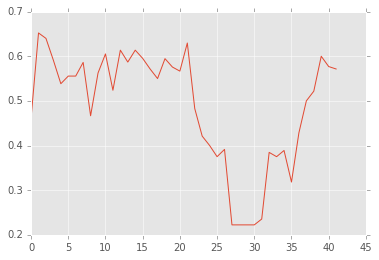

In [99]:
plt.plot(negative_graph_sd)

- Мера сбалансированности: отношение значений < 0 ко всем значениям => чем ближе к 1, тем несбалансированней, чем ближе к 0 - тем ближе к балансу
    - tokens
    - sentences
    
- Seq и Dep могут оказаться пустыми!
    - seq периодически вылетает с ошибкой (добавить проверку i + 2 < len(text))
- количество "глав" должно быть разным для разных произведений (например, для коротких - 5, для длинных - больше)
- 10 хорошее количество глав, но лучше двигаться скользящим окном
- вопрос с nan

### Balanced graph plot

In [100]:
def get_cycles_from_graph(graph):
    cycles = []
    for cycle in nx.cycle_basis(graph):
        cycles.append(list(zip(cycle, cycle[1:])) + [(cycle[-1], cycle[0])])
    return cycles

def is_positive(cycle, graph):
    negatives = 0
    for edge in cycle:
        if graph.edge[edge[0]][edge[1]]['weight'] < 0:
            negatives += 1
    return not negatives % 2

def get_graph_balance(chapters):
    '''Считаем сбалансированность графа: 
    1. выделить простые циклы из графа
    2. определить знак цикла
    3. находим меру сбалансированности - долю положительных циклов среди всех
    '''
    balance_cycle = []
    for i in range(len(chapters)):
        graph = novelgraph(chapters[i])
        graph_cycles = get_cycles_from_graph(graph)
#         print(len(graph_cycles))
        balance = numpy.mean(
            [is_positive(cycle, graph) for cycle in graph_cycles])
        balance_cycle.append(balance)
#     print(balance_cycle) 
    return balance_cycle

In [101]:
def get_graph_balance2(chapters):
    '''Считаем сбалансированность графа: 
    1. выделить простые циклы из графа
    2. определить знак цикла
    3. находим меру сбалансированности - долю положительных циклов среди всех
    '''
    balance_cycle = []
    for i in range(len(chapters)):
        graph = novelgraph2(chapters[i])
        graph_cycles = get_cycles_from_graph(graph)
#         print(len(graph_cycles))
        balance = numpy.mean(
            [is_positive(cycle, graph) for cycle in graph_cycles])
        balance_cycle.append(balance)

    return balance_cycle

In [102]:
balance = get_graph_balance(chapters)

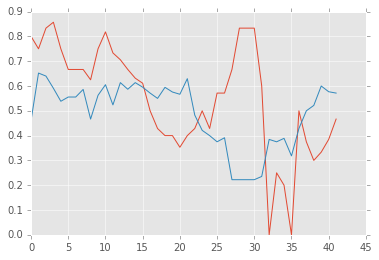

In [109]:
plt.plot(balance, label='Balance')
plt.plot(negative_graph_sd, label='Negative_sent')
# balance = red, negative = blue
# plt.legend()
plt.savefig('./projectgraphs/plot/balance_sher.pdf')

20 - Грегсон находит "убийцу" (Артур Шарпентьер)

25-30 -  смерть Стенджерсона и поимка убийцы, его исповедь

32 - спасение Люси от обезумевшей лошади, знакомство с Хоупом.

35 - накаление обстановки между Джоном Феррером и мормонами (Бр. Янгом и его кланом, куда входят Дребберы и Стенджерсоны). Побег Джона с дочерью и Хоупом в лес, попытка убежать, убийство Феррера.

In [105]:
balance2 = get_graph_balance2(chapters)

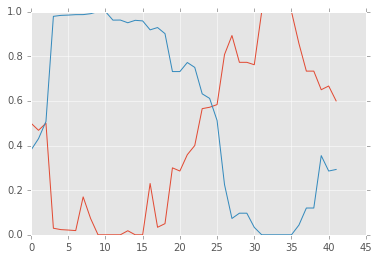

In [108]:
plt.plot(balance2, label='Balance')
plt.plot(negative_graph_di, label='Negative_sent')
plt.savefig('./projectgraphs/plot/balance_sher_dialog.pdf')

Начало "несбалансированности" приходится на расследование убийства Еноха Дреббера и заканчивается поимкой убийцы - Джефферсона Хоупа. - кульминация.

20 - 30 Исповедь Хоупа - развязка, график стабилизируется. События позитивные, Джона и Люси спасают всадники, их жизнь налаживается, они занимаются хозяйством. Люси влюбляется в красавца Джефферсона Хоупа.

Падение графика происходит в точке 35. Ей соответсвуют следующие события: накаление обстановки между Джоном Феррером и мормонами (Бр. Янгом и его кланом, куда входят Дребберы и Стенджерсоны). Побег Джона с дочерью и Хоупом в лес, попытка убежать, убийство Феррера, похищение Люси, а затем и смерть Люси. И на десерт - месть Хоупа негодяям, и его самоубийство.

In [55]:
a = rolling_window_slices(10000, 1000, len(text.tags))

In [76]:
a[25:30]

[slice(25000, 35000, None),
 slice(26000, 36000, None),
 slice(27000, 37000, None),
 slice(28000, 38000, None),
 slice(29000, 39000, None)]

In [77]:
text.tags.loc[(slice(25000, 39000, None)), ['Token', 'Sentiment']]

,Token,Sentiment
25000,and,NaN
25001,made,NaN
25002,the,NaN
25003,case,NaN
25004,more,NaN
25005,obscure,NaN
25006,",",NaN
25007,have,NaN
25008,served,NaN
25009,to,NaN
